# Super Simple Keras model on TriFeature for multiplicity determination

In [1]:
features = ["T", "E", "Size", "EToF", "EnergyMoment", "TSpawn", "MaxEHit", "X", "Y", "Z"]
label = "prim"
dp = 12
neutrons = [1, 2, 3, 4]

In [2]:
import tensorflow
from tensorflow import keras

print("tensorflow", tensorflow.__version__)
print("keras", keras.__version__)

tensorflow 2.3.1
keras 2.4.0


In [3]:
import sys
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.preprocessing
from sklearn.metrics import (
    balanced_accuracy_score,
    confusion_matrix,
    plot_confusion_matrix,
)

sys.path.append("..")
from helpers import filename_for

In [4]:
files = [filename_for(15, dp, 600, 500, n, "inclxx", s, "clusterfeature.parquet") for n in neutrons for s in range(20)]
dfs = [pd.read_parquet(file) for file in files]
data = pd.concat(dfs, ignore_index=True).sample(frac=1, random_state=1337)

data = data[(abs(data["X"]) < 125) & (abs(data["Y"]) < 125) & (data["T"] < 100)]

print(data["prim"].value_counts())
display(data)

0.0    4225482
1.0    1412871
Name: prim, dtype: int64


,i_event,prim,T,E,Size,EToF,EnergyMoment,TSpawn,MaxEHit,X,Y,Z
1278499,201.0,0.0,72.743546,4.001890,1.0,356.984039,0.000000e+00,0.000000,4.001890,-7.500000,-9.346230,1507.5
123683,2819.0,0.0,70.245926,4.904631,2.0,445.918732,2.805709e+00,0.121427,2.531206,-6.497627,7.500000,1552.5
5226144,5531.0,1.0,62.695213,320.804871,10.0,625.841431,1.043842e+01,1.434420,94.084465,-17.500000,-4.665872,1507.5
2404152,6755.0,1.0,64.116348,337.163696,13.0,576.190308,1.368203e+01,2.412778,84.405426,-26.984325,2.500000,1512.5
5462128,6398.0,1.0,67.126511,264.252136,9.0,590.024841,8.335863e+00,0.875057,45.102974,12.224815,-12.500000,1592.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1428135,5803.0,0.0,82.358917,1.178269,1.0,295.601349,2.273737e-13,0.000000,1.178269,-22.500000,1.662647,1607.5
480729,6068.0,0.0,78.656456,1.329785,1.0,283.639130,2.009718e-14,0.000000,1.329785,-117.500000,-85.086517,1507.5
3361959,7596.0,0.0,67.661819,41.934479,3.0,556.118164,3.580651e+00,0.262080,19.005957,-24.975262,-27.500000,1582.5
2065244,7478.0,0.0,68.507622,3.715144,1.0,515.199280,5.024296e-15,0.000000,3.715144,-22.107210,17.500000,1572.5


In [5]:
scaler = sklearn.preprocessing.RobustScaler()
data[features] = scaler.fit_transform(data[features])

display(data)

,i_event,prim,T,E,Size,EToF,EnergyMoment,TSpawn,MaxEHit,X,Y,Z
1278499,201.0,0.0,0.940522,-0.078819,0.0,-1.238520,-7.997408e-14,0.000000,-0.114100,-0.214231,-0.266704,-0.909091
123683,2819.0,0.0,0.464201,-0.063014,1.0,-0.612463,9.868512e-01,0.332798,-0.157572,-0.185592,0.214617,-0.090909
5226144,5531.0,1.0,-0.975796,5.467720,9.0,0.654104,3.671504e+00,3.931362,2.548685,-0.499945,-0.132979,-0.909091
2404152,6755.0,1.0,-0.704771,5.754128,12.0,0.304585,4.812376e+00,6.612779,2.262578,-0.770926,0.071760,-0.818182
5462128,6398.0,1.0,-0.130703,4.477603,8.0,0.401973,2.931971e+00,2.398297,1.100822,0.349335,-0.356812,0.636364
...,...,...,...,...,...,...,...,...,...,...,...,...
1428135,5803.0,0.0,2.774271,-0.128255,0.0,-1.670624,0.000000e+00,0.000000,-0.197564,-0.642802,0.047835,0.909091
480729,6068.0,0.0,2.068174,-0.125602,0.0,-1.754832,-7.290530e-14,0.000000,-0.193086,-3.357088,-2.430712,-0.909091
3361959,7596.0,0.0,-0.028614,0.585299,2.0,0.163287,1.259421e+00,0.718292,0.329411,-0.713524,-0.785383,0.454545
2065244,7478.0,0.0,0.132689,-0.083839,0.0,-0.124762,-7.820688e-14,0.000000,-0.122576,-0.631580,0.500331,0.272727


In [6]:
prim1 = data[data["prim"] == 1]
prim0 = data[data["prim"] == 0].sample(n=len(prim1.index), random_state=1337)
balanced_data = pd.concat([prim0, prim1], ignore_index=True).sample(frac=1, random_state=1337)

print(balanced_data["prim"].value_counts())

1.0    1412871
0.0    1412871
Name: prim, dtype: int64


In [7]:
msk = np.random.rand(len(balanced_data)) < 0.8
traindata = balanced_data[msk]
testdata = balanced_data[~msk]

print(traindata.shape, testdata.shape)

(2261277, 12) (564465, 12)


In [8]:
x_train = traindata[features].values
y_train = keras.utils.to_categorical(traindata[[label]].values.ravel())

x_val = testdata[features].values
y_val = keras.utils.to_categorical(testdata[[label]].values.ravel())

In [9]:
models = defaultdict(keras.models.Sequential)

models["(SM)"].add(keras.layers.Dense(units=2, activation="softmax"))

models["(10, SM)"].add(keras.layers.Dense(units=10, activation="relu"))
models["(10, SM)"].add(keras.layers.Dense(units=2, activation="softmax"))

models["(20, SM)"].add(keras.layers.Dense(units=20, activation="relu"))
models["(20, SM)"].add(keras.layers.Dense(units=2, activation="softmax"))

models["(100, SM)"].add(keras.layers.Dense(units=100, activation="relu"))
models["(100, SM)"].add(keras.layers.Dense(units=2, activation="softmax"))

models["(100, 10, SM)"].add(keras.layers.Dense(units=100, activation="relu"))
models["(100, 10, SM)"].add(keras.layers.Dense(units=10, activation="relu"))
models["(100, 10, SM)"].add(keras.layers.Dense(units=2, activation="softmax"))

models["(1000, 100, SM)"].add(keras.layers.Dense(units=1000, activation="relu"))
models["(1000, 100, SM)"].add(keras.layers.Dense(units=100, activation="relu"))
models["(1000, 100, SM)"].add(keras.layers.Dense(units=2, activation="softmax"))

models["(3000, 200, 100, SM)"].add(keras.layers.Dense(units=3000, activation="relu"))
models["(3000, 200, 100, SM)"].add(keras.layers.Dense(units=200, activation="relu"))
models["(3000, 200, 100, SM)"].add(keras.layers.Dense(units=10, activation="relu"))
models["(3000, 200, 100, SM)"].add(keras.layers.Dense(units=2, activation="softmax"))

optimizer = keras.optimizers.Adam
loss = keras.losses.CategoricalCrossentropy

histories = {}
for name, model in models.items():
    print(name)
    model.compile(loss=loss(), optimizer=optimizer(), metrics=["accuracy"])
    histories[name] = model.fit(
        x=x_train, y=y_train, batch_size=1000, epochs=50, validation_data=(x_val, y_val), verbose=2
    )
    print("----")

(SM)
Epoch 1/50
2262/2262 - 2s - loss: 0.3539 - accuracy: 0.8572 - val_loss: 0.3218 - val_accuracy: 0.8763
Epoch 2/50
2262/2262 - 2s - loss: 0.3214 - accuracy: 0.8783 - val_loss: 0.3190 - val_accuracy: 0.8799
Epoch 3/50
2262/2262 - 2s - loss: 0.3195 - accuracy: 0.8797 - val_loss: 0.3169 - val_accuracy: 0.8804
Epoch 4/50
2262/2262 - 2s - loss: 0.3175 - accuracy: 0.8800 - val_loss: 0.3147 - val_accuracy: 0.8807
Epoch 5/50
2262/2262 - 2s - loss: 0.3154 - accuracy: 0.8801 - val_loss: 0.3126 - val_accuracy: 0.8806
Epoch 6/50
2262/2262 - 2s - loss: 0.3135 - accuracy: 0.8802 - val_loss: 0.3107 - val_accuracy: 0.8809
Epoch 7/50
2262/2262 - 2s - loss: 0.3117 - accuracy: 0.8805 - val_loss: 0.3089 - val_accuracy: 0.8810
Epoch 8/50
2262/2262 - 2s - loss: 0.3103 - accuracy: 0.8808 - val_loss: 0.3082 - val_accuracy: 0.8817
Epoch 9/50
2262/2262 - 2s - loss: 0.3097 - accuracy: 0.8812 - val_loss: 0.3074 - val_accuracy: 0.8819
Epoch 10/50
2262/2262 - 2s - loss: 0.3094 - accuracy: 0.8815 - val_loss: 0.30

In [10]:
x_test = testdata[features].values
y_true = testdata[[label]].values.ravel()

# x_all = data[features].values
# y_all = data[[label]].values.ravel()

for name, model in models.items():
    y_pred = model.predict(x_test)
    y_pred = np.argmax(y_pred, axis=1)
    bac = balanced_accuracy_score(y_true, y_pred)

    # y_pred_all = model.predict(x_all)
    # y_pred_all = np.argmax(y_pred_all, axis=1)
    # bac_all = balanced_accuracy_score(y_all, y_pred_all)

    print(name, bac)  # , bac_all)

(SM) 0.8820232425357262
(10, SM) 0.900034105778406
(20, SM) 0.9013771799650594
(100, SM) 0.9041455345411757
(100, 10, SM) 0.9056350225493087
(1000, 100, SM) 0.9059973001916521
(3000, 200, 100, SM) 0.9061168448637276


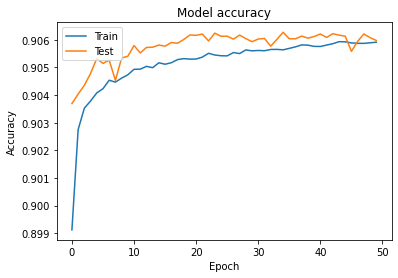

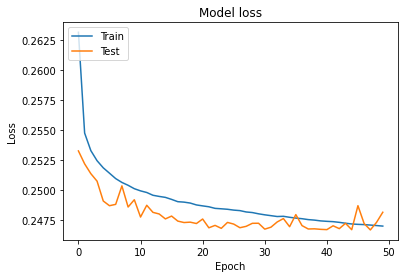

In [11]:
history = histories["(1000, 100, SM)"]

# Plot training & validation accuracy values
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

# Plot training & validation loss values
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

In [12]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

y_pred = models["(20, SM)"].predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

bac = balanced_accuracy_score(y_true, y_pred)
print(bac)
cm = confusion_matrix(y_true, y_pred, labels=range(0, 2))
print(cm)
cmrel = confusion_matrix(y_true, y_pred, labels=range(0, 2), normalize="true")
print(cmrel)

0.9013771799650594
[[247614  34858]
 [ 20823 261170]]
[[0.877 0.123]
 [0.074 0.926]]
